In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import skew, kurtosis

In [4]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/Mobiles Dataset (2025).csv", encoding='ISO-8859-1')

# Clean RAM column
df['RAM'] = df['RAM'].str.extract(r'(\d+)').astype(float)

# Clean Mobile Weight (remove 'g')
df['Mobile Weight'] = df['Mobile Weight'].str.replace('g', '', regex=False).astype(float)

# Clean Battery Capacity (remove 'mAh' and commas)
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace('mAh', '', regex=False).str.replace(',', '').astype(float)

# Clean Screen Size (extract float from text like '6.5 inches')
df['Screen Size'] = df['Screen Size'].str.extract(r'(\d+\.\d+)').astype(float)

# Function to clean price columns
def clean_price_column(column):
    return column.str.replace(r'[^\d.]', '', regex=True).replace('', np.nan).astype(float)

# Price columns to clean
price_columns = [
'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)',
'Launched Price (USA)', 'Launched Price (Dubai)'
 ]


df[['RAM', 'Mobile Weight', 'Battery Capacity', 'Screen Size',
   'Launched Price (Pakistan)', 'Launched Price (India)',
   'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']].head(10)

,RAM,Mobile Weight,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai)
0,6.0,174.0,3600.0,6.1,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799"
1,6.0,174.0,3600.0,6.1,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999"
2,6.0,174.0,3600.0,6.1,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199"
3,6.0,203.0,4200.0,6.7,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199"
4,6.0,203.0,4200.0,6.7,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399"
5,6.0,203.0,4200.0,6.7,"PKR 274,999","INR 104,999","CNY 6,999",USD 999,"AED 3,599"
6,6.0,206.0,4400.0,6.1,"PKR 284,999","INR 99,999","CNY 6,999",USD 999,"AED 3,499"
7,8.0,206.0,4400.0,6.1,"PKR 294,999","INR 104,999","CNY 7,099","USD 1,049","AED 3,699"
8,8.0,206.0,4400.0,6.1,"PKR 314,999","INR 114,999","CNY 7,499","USD 1,099","AED 3,899"
9,6.0,221.0,4500.0,6.7,"PKR 314,999","INR 109,999","CNY 7,499","USD 1,099","AED 3,799"


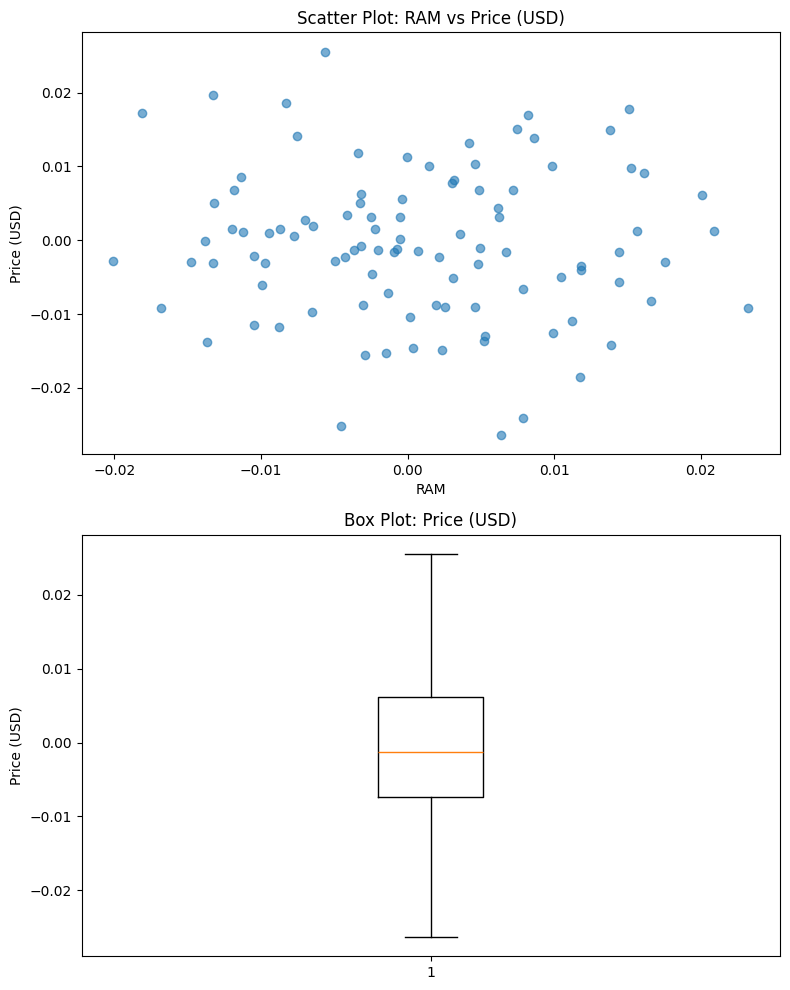

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
ram_data = np.random.normal(0, 0.01, 100)  # Simulated RAM data
price_data = np.random.normal(0, 0.01, 100)  # Simulated Price data

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Scatter Plot
axs[0].scatter(ram_data, price_data, alpha=0.6)
axs[0].set_title('Scatter Plot: RAM vs Price (USD)')
axs[0].set_xlabel('RAM')
axs[0].set_ylabel('Price (USD)')

# Box Plot
axs[1].boxplot(price_data)
axs[1].set_title('Box Plot: Price (USD)')
axs[1].set_ylabel('Price (USD)')

# Show the plots
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # <-- This was missing in your version
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

# Ensure string conversion before cleanup
df['Launched Price (USA)'] = df['Launched Price (USA)'].astype(str)
df['Launched Price (USA)'] = df['Launched Price (USA)'].str.replace('USD', '', regex=False).str.strip()

# Convert to numeric
df['Launched Price (USA)'] = pd.to_numeric(df['Launched Price (USA)'], errors='coerce')

# Drop NaNs
df = df.dropna(subset=['Launched Price (USA)'])

# Remove outliers
df_clean = remove_outliers(df, 'Launched Price (USA)')

# Print the cleaned DataFrame
print(df_clean)

    Company Name            Model Name  Mobile Weight  RAM Front Camera  \
0          Apple       iPhone 16 128GB          174.0  6.0         12MP   
1          Apple       iPhone 16 256GB          174.0  6.0         12MP   
2          Apple       iPhone 16 512GB          174.0  6.0         12MP   
3          Apple  iPhone 16 Plus 128GB          203.0  6.0         12MP   
4          Apple  iPhone 16 Plus 256GB          203.0  6.0         12MP   
..           ...                   ...            ...  ...          ...   
922         POCO              X7 128GB          195.0  6.0         16MP   
923         POCO          X7 Pro 256GB          207.0  8.0         20MP   
924         POCO           M7 5G 128GB          198.0  6.0          8MP   
925         Poco          Pad 5G 128GB          571.0  8.0          8MP   
926         Poco          Pad 5G 256GB          571.0  8.0          8MP   

    Back Camera                Processor  Battery Capacity  Screen Size  \
0          48MP         

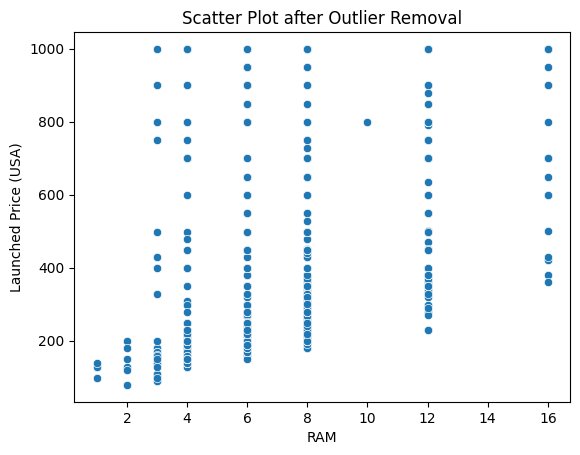

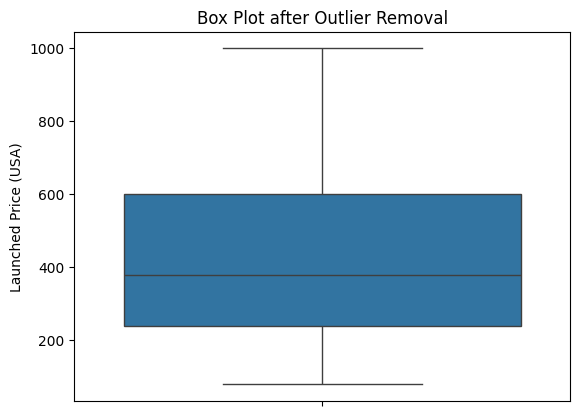

In [8]:
# Scatter Plot after outlier removal
sns.scatterplot(data=df_clean, x='RAM', y='Launched Price (USA)')
plt.title("Scatter Plot after Outlier Removal")
plt.show()

# Box Plot after outlier removal
sns.boxplot(data=df_clean['Launched Price (USA)'])
plt.title("Box Plot after Outlier Removal")
plt.show()

In [9]:
features = ['RAM', 'Mobile Weight', 'Battery Capacity', 'Screen Size']
target = 'Launched Price (USA)'

X = df_clean[features]
y = df_clean[target]

# Imputation using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Create an imputer instance
X = imputer.fit_transform(X)  # Fit and transform the data

# Alternatively, you can drop rows with NaNs:
# df_clean.dropna(subset=features, inplace=True)
# X = df_clean[features]
# y = df_clean[target]


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("-" * 30)

Linear Regression
R² Score: 0.3840370670276053
MSE: 37989.943513096776
------------------------------
Decision Tree
R² Score: 0.661647738326224
MSE: 20868.111732774283
------------------------------
Random Forest
R² Score: 0.8240251142316066
MSE: 10853.373818785509
------------------------------


In [10]:
print("Skewness of Price (USA):", skew(df_clean['Launched Price (USA)']))
print("Kurtosis of Price (USA):", kurtosis(df_clean['Launched Price (USA)']))

Skewness of Price (USA): 0.7326569913513195
Kurtosis of Price (USA): -0.6387129202172397
